# Import Required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Load Dataset

In [2]:
df=pd.read_excel('flight_fare_case.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Shape of data

In [4]:
df.shape

(10683, 11)

# Basic Statistics

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# check null value

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Drop null values

In [7]:
df.dropna(inplace=True)

# Basic info of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


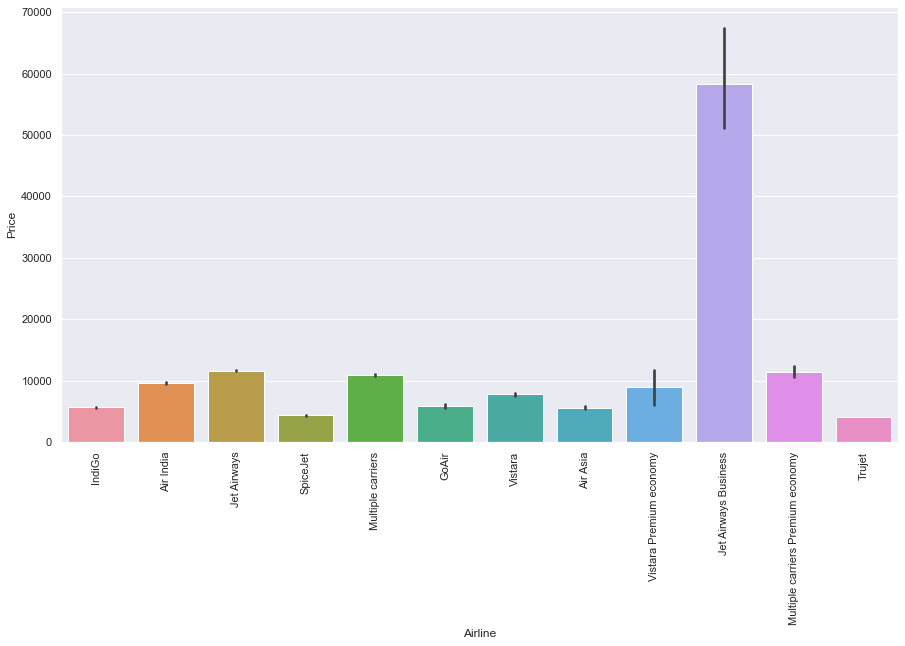

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

# LabelEncoding for Total_Stops

In [10]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop': 1,'2 stops':2,'3 stops':3,'4 stops': 4})

# Extract day and month 

In [11]:
df['Journey_Day']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Journey_Month']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month


In [12]:
list(df['Date_of_Journey'])

['24/03/2019',
 '1/05/2019',
 '9/06/2019',
 '12/05/2019',
 '01/03/2019',
 '24/06/2019',
 '12/03/2019',
 '01/03/2019',
 '12/03/2019',
 '27/05/2019',
 '1/06/2019',
 '18/04/2019',
 '24/06/2019',
 '9/05/2019',
 '24/04/2019',
 '3/03/2019',
 '15/04/2019',
 '12/06/2019',
 '12/06/2019',
 '27/05/2019',
 '6/03/2019',
 '21/03/2019',
 '3/04/2019',
 '1/05/2019',
 '6/05/2019',
 '9/06/2019',
 '1/06/2019',
 '15/05/2019',
 '18/06/2019',
 '15/06/2019',
 '18/06/2019',
 '1/05/2019',
 '6/04/2019',
 '15/06/2019',
 '18/05/2019',
 '27/06/2019',
 '21/05/2019',
 '18/05/2019',
 '06/03/2019',
 '3/06/2019',
 '21/05/2019',
 '15/03/2019',
 '18/05/2019',
 '6/05/2019',
 '21/03/2019',
 '24/03/2019',
 '27/05/2019',
 '3/05/2019',
 '15/05/2019',
 '27/06/2019',
 '9/03/2019',
 '1/05/2019',
 '24/03/2019',
 '18/06/2019',
 '3/04/2019',
 '24/03/2019',
 '01/03/2019',
 '6/03/2019',
 '6/05/2019',
 '6/03/2019',
 '6/06/2019',
 '3/04/2019',
 '3/06/2019',
 '15/05/2019',
 '24/05/2019',
 '24/06/2019',
 '24/04/2019',
 '6/05/2019',
 '21/0

In [13]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
df.isna().sum()

Airline              0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
Journey_Day        341
Journey_Month      341
dtype: int64

In [15]:
df['Dept_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_min']=pd.to_datetime(df['Dep_Time']).dt.minute


In [16]:
df.drop('Dep_Time',axis=1,inplace=True)

In [17]:
# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


In [18]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [19]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24.0,3.0,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1.0,5.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9.0,6.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12.0,5.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1.0,3.0,16,50,21,35


# Extract hr and min from duration column

In [21]:
duration=list(df['Duration'])

In [22]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i].strip()         # Adds 0 hour
            

In [23]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [24]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [25]:
df['duration_hrs']=duration_hours
df['duration_mins']=duration_mins
df.drop('Duration',axis=1,inplace=True)

In [26]:
df['duration_time(min)']=df['duration_hrs']*60+df['duration_mins']

In [27]:
df.drop(['duration_hrs','duration_mins'],axis=1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_time(min)
0,IndiGo,Banglore,New Delhi,0,3897,24.0,3.0,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1.0,5.0,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9.0,6.0,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12.0,5.0,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1.0,3.0,16,50,21,35,285


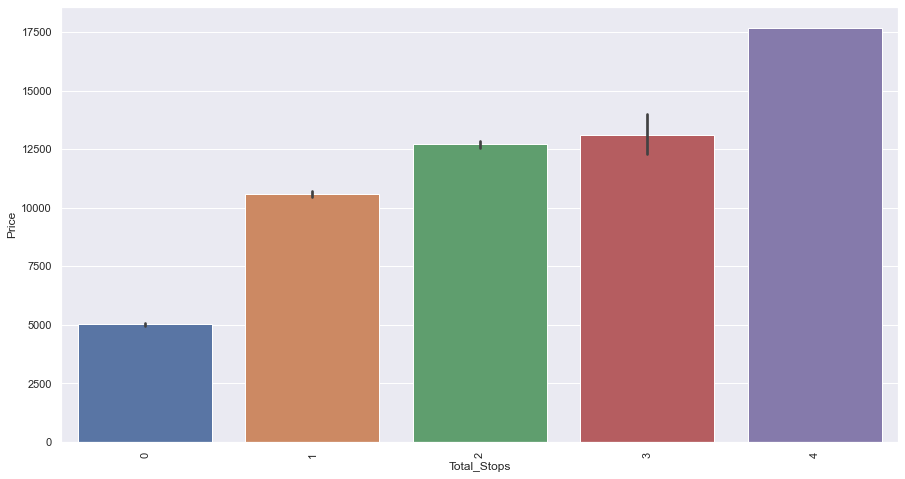

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x='Total_Stops',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [31]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Source']=lb.fit_transform(df['Source'])
df['Destination']=lb.fit_transform(df['Source'])
df['Airline']=lb.fit_transform(df['Airline'])

In [33]:
df.isna().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Price                   0
Journey_Day           341
Journey_Month         341
Dept_hour               0
Dept_min                0
Arrival_hour            0
Arrival_min             0
duration_time(min)      0
dtype: int64

In [34]:
df.dropna(inplace=True)

# Find correlation

In [35]:
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,duration_time(min)
Airline,1.000000,-0.020437,-0.020437,-0.199695,-0.039826,0.022742,0.019939,-0.037799,-0.062405,-0.006247,-0.067944,-0.160129
Source,-0.020437,1.000000,1.000000,0.198316,0.040418,-0.034757,0.127945,0.057575,-0.050925,0.025184,0.025594,0.172638
Destination,-0.020437,1.000000,1.000000,0.198316,0.040418,-0.034757,0.127945,0.057575,-0.050925,0.025184,0.025594,0.172638
Total_Stops,-0.199695,0.198316,0.198316,1.000000,0.616242,-0.020156,0.042669,-0.058732,-0.003689,0.035600,-0.106749,0.738473
Price,-0.039826,0.040418,0.040418,0.616242,1.000000,-0.142584,-0.084579,0.011355,-0.030669,0.025258,-0.086690,0.514006
Journey_Day,0.022742,-0.034757,-0.034757,-0.020156,-0.142584,1.000000,-0.089623,-0.000966,-0.003687,-0.005165,-0.013606,-0.028838
Journey_Month,0.019939,0.127945,0.127945,0.042669,-0.084579,-0.089623,1.000000,0.037099,-0.053950,-0.007108,-0.100030,0.008774
Dept_hour,-0.037799,0.057575,0.057575,-0.058732,0.011355,-0.000966,0.037099,1.000000,-0.022182,0.002647,0.070345,0.007108
Dept_min,-0.062405,-0.050925,-0.050925,-0.003689,-0.030669,-0.003687,-0.053950,-0.022182,1.000000,0.043912,-0.017784,-0.021724
Arrival_hour,-0.006247,0.025184,0.025184,0.035600,0.025258,-0.005165,-0.007108,0.002647,0.043912,1.000000,-0.162482,0.053492


<AxesSubplot:>

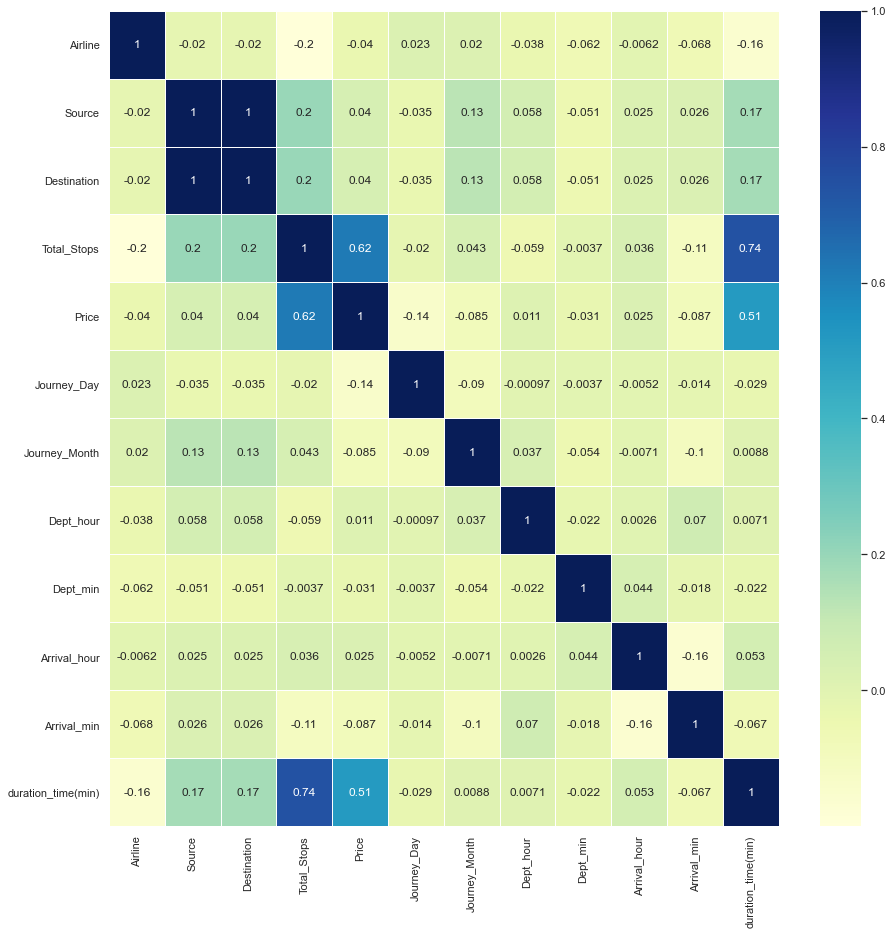

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, linewidths=.5,cmap="YlGnBu")

In [37]:
x=df.drop('Price',axis=1)
y=df['Price']

In [38]:
x.isna().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Journey_Day           0
Journey_Month         0
Dept_hour             0
Dept_min              0
Arrival_hour          0
Arrival_min           0
duration_time(min)    0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8272, 11), (2069, 11), (8272,), (2069,))

# How try all diffrent regression algorithm and find the testing score

In [41]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor

In [42]:
models={
    'LinearRegression': LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "Tree":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "SVR":SVR(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting":GradientBoostingRegressor(),
    "XGBRFRegressor":XGBRFRegressor()
}

In [43]:
for name,model in models.items():
    reg=model.fit(x_train,y_train)
    score=reg.score(x_test,y_test)
    print(f'{name}: {score}')

LinearRegression: 0.4210405323655463
Ridge: 0.4210421940662269
Lasso: 0.42103436842237774
Tree: 0.6888774931048457
KNN: 0.5598485749110973
SVR: 0.15789765741701722
RandomForest: 0.8204631308721811
GradientBoosting: 0.7712836691782903
XGBRFRegressor: 0.7402514394407059


### Hyper parameter tuning

In [44]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
from sklearn.model_selection import RandomizedSearchCV 

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf_random = RandomizedSearchCV(estimator =rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [49]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## Choose best parameter

In [50]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

### Apply algorithm

In [51]:
rf=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [53]:
y_pred=rf.predict(x_test)

In [54]:
rf.score(x_test,y_test)

0.8381567744619856

### Use KFold and cross_val_score for shuffling data

In [55]:
from sklearn.model_selection import KFold,cross_val_score

In [56]:
kfold = KFold(n_splits=10)
cv_result =cross_val_score(rf,x_train,y_train,cv=kfold)

In [57]:
cv_result

array([0.77313379, 0.77146338, 0.84150713, 0.75691473, 0.8143433 ,
       0.8376783 , 0.82644967, 0.80218173, 0.85976744, 0.83885735])

## Model Evaluation 

In [58]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [59]:
R2_score=r2_score(y_test,y_pred)
R2_score

0.8381567744619856

In [60]:
mse=mean_squared_error(y_test,y_pred)
mse

3460749.7937101442

In [61]:
mean_absolute_error(y_test,y_pred)

1159.6556273681633

In [62]:
import math
root_mean_squared_error=math.sqrt(mse)
root_mean_squared_error

1860.3090586540034

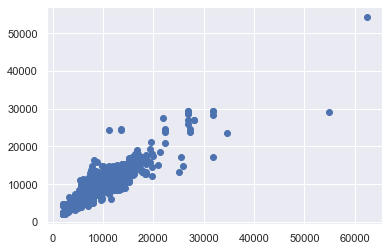

In [63]:
plt.scatter(y_test,y_pred)